### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#1. Análise do faturamento


In [3]:
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Os faturamentos das lojas são:\nLoja 1: R$ {faturamento_loja}\nLoja 2: R$ {faturamento_loja2}\nLoja 3: R$ {faturamento_loja3}\nLoja 4: R$ {faturamento_loja4}")

Os faturamentos das lojas são:
Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58


# 2. Vendas por Categoria


In [4]:
prod_categoria_loja = (
    loja.groupby('Categoria do Produto')
    .agg(
        loja_1 = ('Produto', 'count')
    )
    .sort_values('loja_1', ascending=False)
)

prod_categoria_loja2 = (
    loja2.groupby('Categoria do Produto')
    .agg(
        loja_2 = ('Produto', 'count')
    )
    .sort_values('loja_2', ascending=False)
)

prod_categoria_loja3 = (
    loja3.groupby('Categoria do Produto')
    .agg(
        loja_3 = ('Produto', 'count')
    )
    .sort_values('loja_3', ascending=False)
)

prod_categoria_loja4 = (
    loja4.groupby('Categoria do Produto')
    .agg(
        loja_4 = ('Produto', 'count')
    )
    .sort_values('loja_4', ascending=False)
)

In [5]:
vendas_por_categoria = pd.concat([prod_categoria_loja, prod_categoria_loja2, prod_categoria_loja3, prod_categoria_loja4], axis=1)
vendas_por_categoria

,loja_1,loja_2,loja_3,loja_4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

In [6]:
avaliacao_loja = loja['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

In [7]:
print(f"As avaliações médias das lojas são:\nLoja 1: {round(avaliacao_loja,2)}\nLoja 2: {round(avaliacao_loja2,2)} \
      \nLoja 3: {round(avaliacao_loja3,2)}\nLoja 4: {round(avaliacao_loja4,2)}")

As avaliações médias das lojas são:
Loja 1: 3.98
Loja 2: 4.04       
Loja 3: 4.05
Loja 4: 4.0


# 4. Produtos Mais e Menos Vendidos

In [8]:
def produto_mais_e_menos_vendido(loja):
  contagem_produtos = loja['Produto'].value_counts()
  mais_vendido = contagem_produtos.max()
  menos_vendido = contagem_produtos.min()
  mais_vendido = contagem_produtos[contagem_produtos == mais_vendido].index.to_list()
  menos_vendido = contagem_produtos[contagem_produtos == menos_vendido].index.to_list()
  return mais_vendido, menos_vendido

def exibe_produto_mais_e_menos_vendido(loja):
  mais_vendido, menos_vendido = produto_mais_e_menos_vendido(loja)
  print(f"Mais vendido(s): {mais_vendido}\nMenos vendido(s): {menos_vendido}")

In [9]:
produtos_loja_1 = exibe_produto_mais_e_menos_vendido(loja)
produtos_loja_1

Mais vendido(s): ['Micro-ondas', 'TV Led UHD 4K', 'Guarda roupas']
Menos vendido(s): ['Headset', 'Celular ABXY']


In [10]:
produtos_loja_2 = exibe_produto_mais_e_menos_vendido(loja2)
produtos_loja_2

Mais vendido(s): ['Iniciando em programação']
Menos vendido(s): ['Jogo de tabuleiro']


In [11]:
produtos_loja_3 = exibe_produto_mais_e_menos_vendido(loja3)
produtos_loja_3

Mais vendido(s): ['Kit banquetas']
Menos vendido(s): ['Blocos de montar']


In [12]:
produtos_loja_4 = exibe_produto_mais_e_menos_vendido(loja4)
produtos_loja_4

Mais vendido(s): ['Cama box']
Menos vendido(s): ['Guitarra']


# 5. Frete Médio por Loja


In [13]:
frete_medio_loja_1 = loja['Frete'].mean()
frete_medio_loja_2 = loja2['Frete'].mean()
frete_medio_loja_3 = loja3['Frete'].mean()
frete_medio_loja_4 = loja4['Frete'].mean()
print(f"Os fretes médios das lojas foram:\nLoja 1: R$ {round(frete_medio_loja_1, 2)}\nLoja 2: R$ {round(frete_medio_loja_2, 2)}\
      \nLoja 3: R$ {round(frete_medio_loja_3, 2)}\nLoja 4: R$ {round(frete_medio_loja_4, 2)}")

Os fretes médios das lojas foram:
Loja 1: R$ 34.69
Loja 2: R$ 33.62      
Loja 3: R$ 33.07
Loja 4: R$ 31.28


# 6. Visualizações

## Gráfico de faturamento por loja

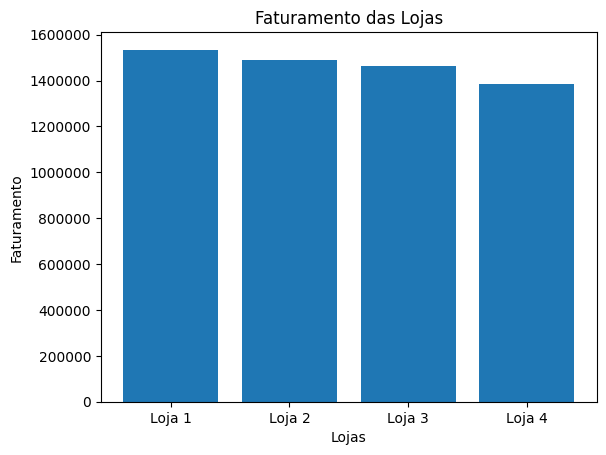

In [14]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]
fig, ax = plt.subplots()
ax.bar(lojas, faturamentos)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Faturamento das Lojas')
ax.set_xlabel('Lojas')
ax.set_ylabel('Faturamento')
plt.show()

## Gráfico temporal de margem de lucro

In [15]:
loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], format='%d/%m/%Y')
loja2['Data da Compra'] = pd.to_datetime(loja2['Data da Compra'], format='%d/%m/%Y')
loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'], format='%d/%m/%Y')
loja4['Data da Compra'] = pd.to_datetime(loja4['Data da Compra'], format='%d/%m/%Y')

In [16]:
loja['margem_lucro'] = loja['Preço'] - loja['Frete']
loja2['margem_lucro'] = loja2['Preço'] - loja2['Frete']
loja3['margem_lucro'] = loja3['Preço'] - loja3['Frete']
loja4['margem_lucro'] = loja4['Preço'] - loja4['Frete']

In [17]:
margem_lucro_loja_1 = (
    loja.groupby(pd.Grouper(key='Data da Compra', freq='QE'))
    .agg(
        margem_lucro_loja_1 = ('margem_lucro', 'sum')
    )
)

margem_lucro_loja_2 = (
    loja2.groupby(pd.Grouper(key='Data da Compra', freq='QE'))
    .agg(
        margem_lucro_loja_2 = ('margem_lucro', 'sum')
    )
)

margem_lucro_loja_3 = (
    loja3.groupby(pd.Grouper(key='Data da Compra', freq='QE'))
    .agg(
        margem_lucro_loja_3 = ('margem_lucro', 'sum')
    )
)

margem_lucro_loja_4 = (
    loja4.groupby(pd.Grouper(key='Data da Compra', freq='QE'))
    .agg(
        margem_lucro_loja_4 = ('margem_lucro', 'sum')
    )
)

In [18]:
margem_lucro = pd.concat([margem_lucro_loja_1, margem_lucro_loja_2, margem_lucro_loja_3, margem_lucro_loja_4], axis=1)


In [19]:
margem_lucro['media_margem_lucro'] = margem_lucro.mean(axis=1)


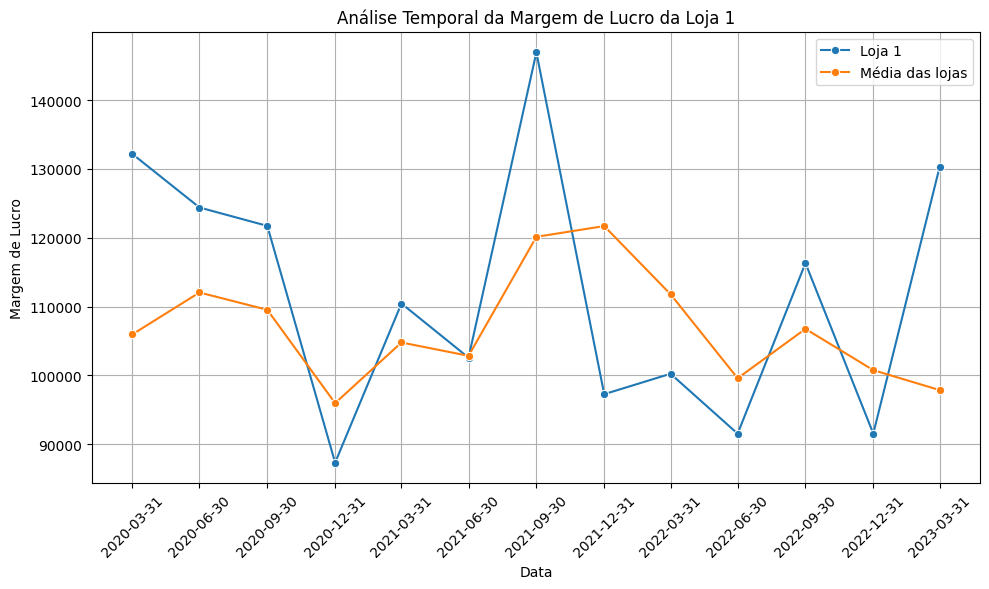

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=margem_lucro, x='Data da Compra', y='margem_lucro_loja_1', marker='o', label='Loja 1')
sns.lineplot(data=margem_lucro, x='Data da Compra', y='media_margem_lucro', marker='o', label='Média das lojas')

plt.title('Análise Temporal da Margem de Lucro da Loja 1')
plt.xlabel('Data')
plt.ylabel('Margem de Lucro')
plt.xticks(margem_lucro.index.unique(), rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

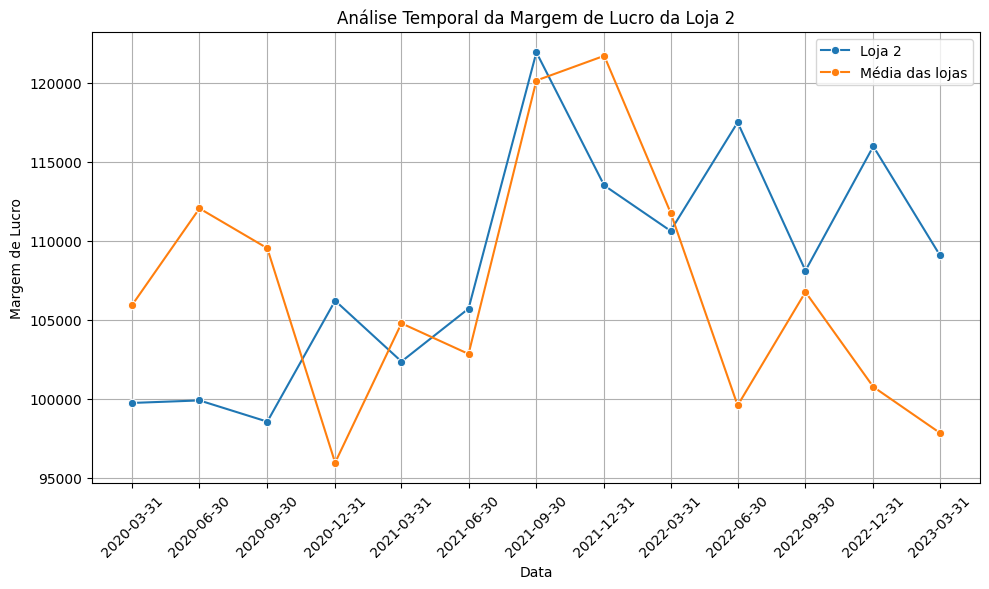

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=margem_lucro, x='Data da Compra', y='margem_lucro_loja_2', marker='o', label='Loja 2')
sns.lineplot(data=margem_lucro, x='Data da Compra', y='media_margem_lucro', marker='o', label='Média das lojas')

plt.title('Análise Temporal da Margem de Lucro da Loja 2')
plt.xlabel('Data')
plt.ylabel('Margem de Lucro')
plt.xticks(margem_lucro.index.unique(), rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

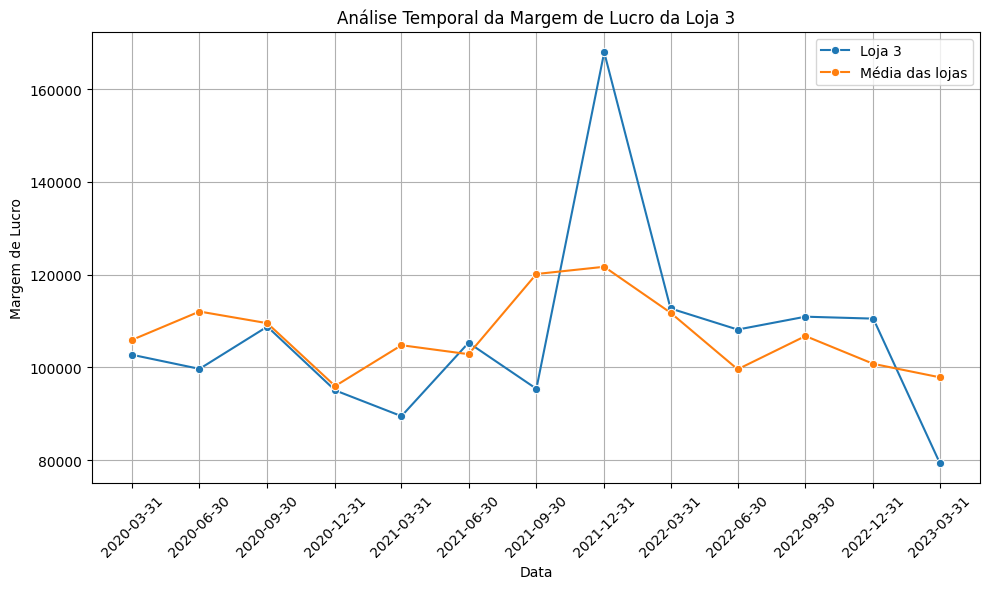

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=margem_lucro, x='Data da Compra', y='margem_lucro_loja_3', marker='o', label='Loja 3')
sns.lineplot(data=margem_lucro, x='Data da Compra', y='media_margem_lucro', marker='o', label='Média das lojas')

plt.title('Análise Temporal da Margem de Lucro da Loja 3')
plt.xlabel('Data')
plt.ylabel('Margem de Lucro')
plt.xticks(margem_lucro.index.unique(), rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

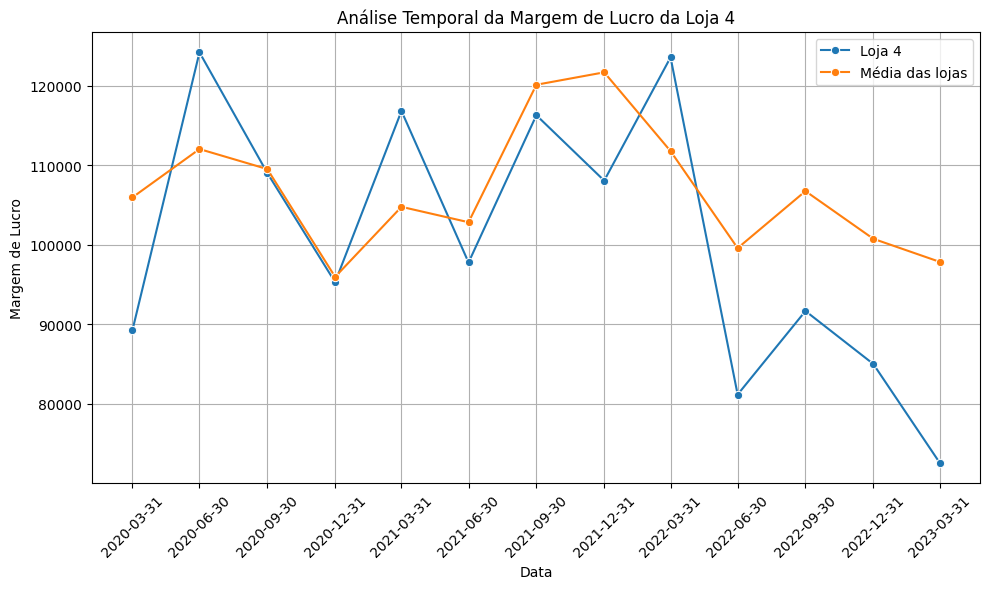

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=margem_lucro, x='Data da Compra', y='margem_lucro_loja_4', marker='o', label='Loja 4')
sns.lineplot(data=margem_lucro, x='Data da Compra', y='media_margem_lucro', marker='o', label='Média das lojas')

plt.title('Análise Temporal da Margem de Lucro da Loja 4')
plt.xlabel('Data')
plt.ylabel('Margem de Lucro')
plt.xticks(margem_lucro.index.unique(), rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Gráfico de avaliação da compra

In [24]:
avaliacao_loja_1 = (
    loja.groupby('Avaliação da compra')
    .agg(
        avaliacao_loja_1 = ('Avaliação da compra', 'count')
    )
)

avaliacao_loja_2 = (
    loja2.groupby('Avaliação da compra')
    .agg(
        avaliacao_loja_2 = ('Avaliação da compra', 'count')
    )
)

avaliacao_loja_3 = (
    loja3.groupby('Avaliação da compra')
    .agg(
        avaliacao_loja_3 = ('Avaliação da compra', 'count')
    )
)

avaliacao_loja_4 = (
    loja4.groupby('Avaliação da compra')
    .agg(
        avaliacao_loja_4 = ('Avaliação da compra', 'count')
    )
)

In [25]:
avaliacao_loja = pd.concat([avaliacao_loja_1, avaliacao_loja_2, avaliacao_loja_3, avaliacao_loja_4], axis=1)


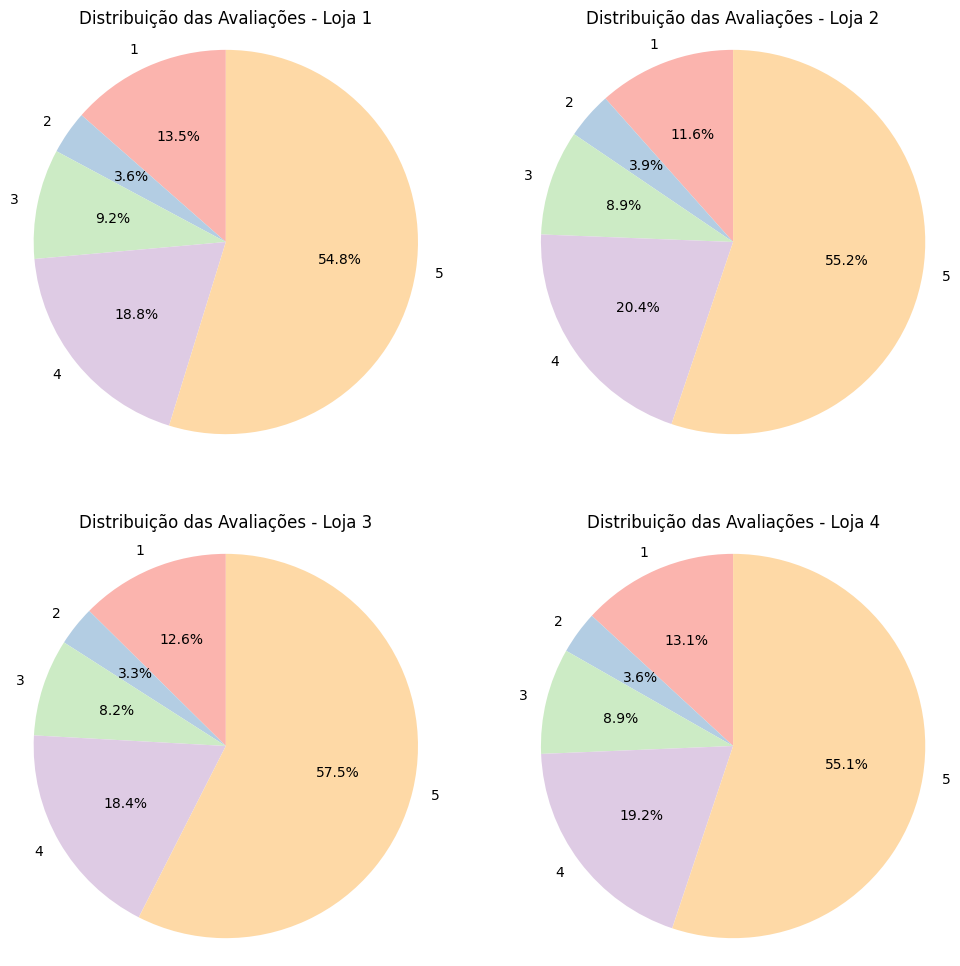

In [26]:
avaliacao_loja_1 = [319, 86, 218, 444, 1292]
avaliacao_loja_2 = [273, 93, 209, 482, 1302]
avaliacao_loja_3 = [297, 79, 193, 434, 1356]
avaliacao_loja_4 = [310, 85, 210, 453, 1300]

lojas = [avaliacao_loja_1, avaliacao_loja_2, avaliacao_loja_3, avaliacao_loja_4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
notas = [1, 2, 3, 4, 5]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes = axes.flatten()

for i in range(4):
    axes[i].pie(lojas[i], labels=notas, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
    axes[i].set_title(f'Distribuição das Avaliações - {nomes_lojas[i]}')
    axes[i].axis('equal')

plt.show()

## Relatório Final de Análise das Lojas – Senhor João

Este relatório tem como objetivo apresentar uma análise detalhada das quatro lojas do Senhor João, a fim de recomendar qual delas deve ser vendida. Para isso, foram considerados diversos fatores estratégicos, como o faturamento total das lojas, as categorias de produtos mais e menos vendidos, a média das avaliações de clientes, o desempenho de produtos individuais e o frete médio praticado por cada loja. As análises foram fundamentadas em dados extraídos das operações comerciais das lojas e complementadas por gráficos que ilustram visualmente os resultados encontrados.

A análise de faturamento revelou que a Loja 1 apresentou o melhor desempenho financeiro, atingindo um total de 1.534.509,12. Em seguida aparecem a Loja 2, com 1.488.459,06, a Loja 3, com 1.464.025,03, e, por fim, a Loja 4, com o menor faturamento, somando 1.384.497,58. Essa informação já indica uma tendência de melhor desempenho financeiro da Loja 1 em comparação às demais, enquanto a Loja 4 se destaca negativamente.

No que diz respeito às categorias de produtos mais vendidas, observou-se que, em todas as lojas, “Móveis” e “Eletrônicos” lideraram as vendas, seguidos por “Brinquedos”, “Eletrodomésticos” e “Esporte e Lazer”. As categorias com menor volume de vendas foram “Instrumentos Musicais”, “Livros” e “Utilidades Domésticas”. Embora a Loja 3 tenha vendido ligeiramente mais móveis do que as demais, a Loja 1 se manteve consistentemente bem posicionada em todas as categorias principais, demonstrando um mix de produtos diversificado e atrativo.

A análise dos produtos mais vendidos por loja trouxe informações adicionais relevantes. Na Loja 1, destacaram-se o "Micro-ondas", a "TV Led UHD 4K" e o "Guarda-roupas", todos produtos de maior valor agregado, o que contribui para o faturamento elevado da loja. Em contrapartida, os produtos menos vendidos foram o "Headset" e o "Celular ABXY". Nas demais lojas, os produtos mais vendidos foram de menor valor unitário, como "Iniciando em Programação" (livro) na Loja 2, "Kit Banquetas" na Loja 3 e "Cama Box" na Loja 4, o que pode ter influenciado a diferença no faturamento.

As avaliações dos clientes foram outro ponto importante da análise. Por meio dos gráficos gerados, foi possível perceber que a maioria dos clientes avaliou as lojas com notas 4 e 5, o que indica uma boa satisfação geral. Em relação ao frete médio, a Loja 4 apresentou o menor valor, com frete médio de 31,28, seguida pela Loja 3 (33,07), Loja 2 (33,62) e Loja 1 (34,69). Apesar do frete mais elevado, a Loja 1 compensa essa diferença com um ticket médio mais alto, justificado pelos produtos de maior valor agregado que comercializa.

Com base nas análises realizadas, recomenda-se que o Senhor João venda a Loja 4. Apesar de apresentar o menor custo médio de frete, a Loja 4 também foi a que obteve o menor faturamento entre todas, demonstrando um desempenho financeiro inferior. Além disso, seus produtos mais vendidos, como a "Cama Box", não apresentam o mesmo potencial de valor agregado que os produtos campeões de vendas das outras lojas. Embora tenha um bom índice de avaliações positivas, a Loja 4 não se destaca frente às concorrentes em nenhuma das categorias principais de vendas.

Por outro lado, a Loja 1 deve ser mantida, pois apresenta o melhor desempenho geral em praticamente todos os indicadores analisados: maior faturamento, variedade de produtos em categorias de alta demanda, maior venda de produtos de alto valor, satisfação dos clientes acima da média e desempenho sólido em todas as frentes.

Assim, vender a Loja 4 e manter a Loja 1 permitirá que o Senhor João concentre seus esforços e investimentos na operação que demonstra maior potencial de crescimento e rentabilidade.